# Introduction

In [12]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
import torch
print(torch.cuda.is_available())
torch.cuda.set_device(0)

import warnings
warnings.filterwarnings("ignore")

True


In [5]:
file_name = '/home/wanjingyi/Desktop/dsan-5000-project-962570185-main/IMDB-Dataset.csv'
df=pd.read_csv(file_name)  
print(df.shape)

#CONVERT FROM STRING LABELS TO INTEGERS 
labels=[]; #y1=[]; y2=[]
sentiment=[]
for label in df["sentiment"]:
    if label not in labels:
        labels.append(label)
        print("index =",len(labels)-1,": label =",label)
    for i in range(0,len(labels)):
        if(label==labels[i]):
            sentiment.append(i)
sentiment=np.array(sentiment)
 
corpus=df["review"].to_list()
print("number of text chunks = ",len(corpus))
print(corpus[0:3])

vectorizer=CountVectorizer(min_df=0.001)   
Xs  =  vectorizer.fit_transform(corpus)   
X=np.array(Xs.todense())
maxs=np.max(X,axis=0)
X=np.ceil(X/maxs)
print(X.shape)

(50000, 2)
index = 0 : label = positive
index = 1 : label = negative
number of text chunks =  50000
["One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and sha

#### The feature data X is converted from the text corpus. And the feature represents the frequency of each word that appears in the reviews, subject to a minimum sample frequency of of 0.1% of the documents. This transformation results in a bag-of-words representation of the text data.

# Theory

## KMEAN
KMEAN is a machine learning method for clustering. It can group the similar data together by iteration.
The idea of the K-Means algorithm is very simple. For a given sample set, the sample set is divided into K clusters based on the distance between the samples. The algorithm will make the points within the cluster as closely connected as possible, while keeping the distance between clusters as large as possible. The Elbow method iteratively calculates k from 1 to n for a dataset of n points. After each clustering is completed, the sum of squares of the distance between each point and the center of the cluster it belongs to is calculated. It can be imagined that this sum of squares will gradually decrease until k=n, when the sum of squares is 0, because each point is the center of the cluster it belongs to.

## DBSAN
DBSCAN is a clustering algorithm based on density. It clusters points that are very close to each other into a class, and also marks points in low-density areas as outliers. Firstly, the algorithm uses the specified neighborhood density parameter to find the core points among all points and determine the set of core points. Then it randomly select a core point from the set, and find all samples that can reach its density to generate clustering clusters. While iteration, the remaining core points that have not been clustered in the set will be randomly selected. Until all clusters with achievable density of core points are completely discovered, the iteration will be stopped.

# Hierachical clustering
The hierarchical clustering algorithm divides the dataset into clusters layer by layer, and the clusters generated by the subsequent layer are based on the results of the previous layer. Hierarchical clustering algorithms are generally divided into two categories:
Divisive hierarchical clustering: also known as top-down hierarchical clustering, where all objects initially belong to a cluster, and each time a cluster is divided into multiple clusters according to certain criteria, repeating this process until each object is a cluster.
Agglomerative hierarchical clustering: also known as bottom-up hierarchical clustering, where each object starts as a cluster and merges the two closest clusters according to certain criteria to generate a new cluster. This process repeats until all objects belong to the same cluster.


# Method

In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

## KMEAN

### Elbow method

/home/wanjingyi/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/wanjingyi/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/wanjingyi/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/wanjingyi/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to

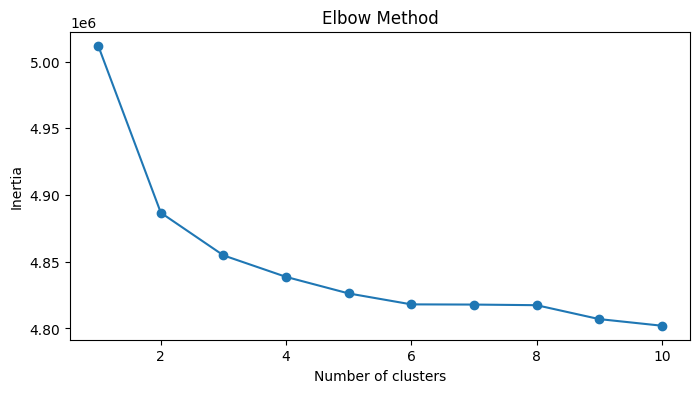

In [8]:
# Elbow method
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
    inertia.append(kmeans.inertia_)

 
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

### Silhouette analysis

/home/wanjingyi/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/wanjingyi/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/wanjingyi/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/wanjingyi/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to

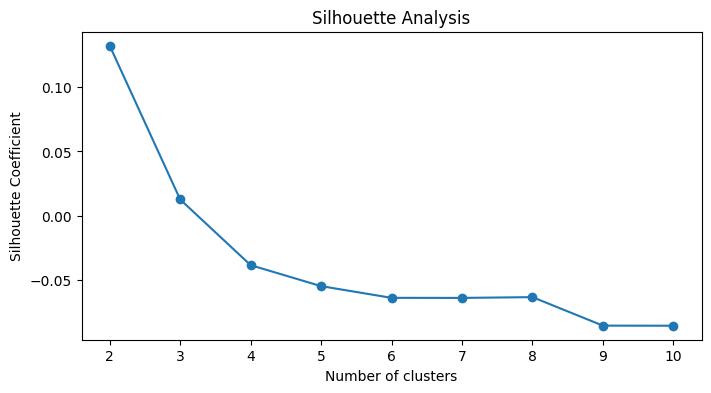

In [9]:
# Silhouette analysis
silhouette_coefficients = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_coefficients.append(score)
plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), silhouette_coefficients, marker='o')
plt.title('Silhouette Analysis')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()

# DBSAN

In [17]:
dbscan = DBSCAN(eps=0.1, min_samples=10)
dbscan.fit(X)
labels = dbscan.labels_
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):

    if k == -1:
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)

 
plt.title('Estimated number of clusters: %d' % len(unique_labels))
plt.show()

## Hierachical Clustering

In [ ]:
distance_metrics = ['euclidean', 'cityblock', 'cosine']

plt.figure(figsize=(15, 5))

for i, metric in enumerate(distance_metrics, 1):
    if metric != 'cosine':
        Y = pdist(X, metric=metric)

    else:
        Y = pdist(X, lambda u, v: cosine_similarity(u.reshape(1, -1), v.reshape(1, -1))[0, 0])
        Y = 1 - Y  

 
    Z = linkage(squareform(Y), method='average') 
    plt.subplot(1, 3, i)
    dendrogram(Z)
    plt.title(f"Hierarchical Clustering with {metric} Distance")
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')

plt.tight_layout()
plt.show()

# Results

#### Compare all the clustering results above, 
xxx seems works the best because.
They are xxx

I think in this case, Hierachical is prefered as it is easy to implement with predefined number of clusters compared with KMEAN. Meanwhile, it perform better compared with the DBSAN for high dimensional feature.